In [42]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
from dotenv import load_dotenv
from census import Census
from itertools import chain 
from matplotlib import pyplot as plt

In [43]:
load_dotenv()
api_key = os.getenv('api_key')

# Load Census Data

In [3]:
nyc_tracts = gpd.read_file("https://data.cityofnewyork.us/resource/63ge-mke6.geojson?$limit=100000")
nyc_tracts.head()

,shape_area,ntaname,cdtaname,shape_leng,boroname,ct2020,nta2020,borocode,cdeligibil,geoid,boroct2020,cdta2020,ctlabel,geometry
0,1843004.52241,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),10833.0439286,Manhattan,000100,MN0191,1,None,36061000100,1000100,MN01,1,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,1006116.58429,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5075.33199978,Manhattan,001401,MN0302,1,None,36061001401,1001401,MN03,14.01,"MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ..."
2,1226206.24719,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4459.1560187,Manhattan,001402,MN0302,1,None,36061001402,1001402,MN03,14.02,"MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ..."
3,2399276.86435,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6391.92117449,Manhattan,001800,MN0302,1,None,36061001800,1001800,MN03,18,"MULTIPOLYGON (((-73.98985 40.72052, -73.98972 ..."
4,1740173.87581,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5779.06260724,Manhattan,002201,MN0302,1,None,36061002201,1002201,MN03,22.01,"MULTIPOLYGON (((-73.97875 40.71993, -73.97879 ..."


In [4]:
# select all tracts in the east village
cb3_sectors = {1: ['004200', '004002', '004001', '003602', '003800'],
2: ['003400', '003200', '003002'],
3: ['002800', '002602', '002601', '002202'],
4: ['003001', '002201'],
5: ['001200', '001001', '001402', '001401'],
6: ['000600', '000201', '000202'],
7: ['000800', '002700', '002500'],
8: ['002902', '001600'],
9: ['001800', '003601'],
10: ['002400', '002000', '001002']}

cb3_tracts = list(chain.from_iterable(cb3_sectors.values()))

In [5]:
# create a gdf of just cb3
cb3_gdf = nyc_tracts[nyc_tracts['cdta2020'] == 'MN03'].copy()
print(cb3_gdf.shape[0], len(cb3_tracts))

31 31


In [6]:
cb3_gdf['sectors'] = np.select([cb3_gdf['ct2020'].isin(cb3_sectors[i]) for i in cb3_sectors.keys()], list(cb3_sectors.keys()))
cb3_gdf.head()

,shape_area,ntaname,cdtaname,shape_leng,boroname,ct2020,nta2020,borocode,cdeligibil,geoid,boroct2020,cdta2020,ctlabel,geometry,sectors
1,1006116.58429,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5075.33199978,Manhattan,001401,MN0302,1,None,36061001401,1001401,MN03,14.01,"MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ...",5
2,1226206.24719,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4459.1560187,Manhattan,001402,MN0302,1,None,36061001402,1001402,MN03,14.02,"MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ...",5
3,2399276.86435,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6391.92117449,Manhattan,001800,MN0302,1,None,36061001800,1001800,MN03,18,"MULTIPOLYGON (((-73.98985 40.72052, -73.98972 ...",9
4,1740173.87581,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5779.06260724,Manhattan,002201,MN0302,1,None,36061002201,1002201,MN03,22.01,"MULTIPOLYGON (((-73.97875 40.71993, -73.97879 ...",4
5,1141217.52723,East Village,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4521.25106638,Manhattan,002601,MN0303,1,None,36061002601,1002601,MN03,26.01,"MULTIPOLYGON (((-73.97689 40.7225, -73.97728 4...",3


In [16]:
cb3_gdf['geometry'].centroid.apply(lambda x: x.coords[0])

/var/folders/_q/g5l2s5950hz1zr9syt43gzp80000gn/T/ipykernel_2192/1559683711.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cb3_gdf['geometry'].centroid.apply(lambda x: x.coords[0])


1       (-73.98733213729889, 40.715160465738236)
2         (-73.9858816314248, 40.71751329862122)
3        (-73.99084216687712, 40.71904611994839)
4       (-73.98184415959811, 40.719115665463704)
5       (-73.97993015397464, 40.722584851642274)
6       (-73.97861335594027, 40.724389224159616)
7         (-73.97681304479437, 40.7268609558129)
9         (-73.9837070191726, 40.72555328579251)
11      (-73.98145767697618, 40.729005908590665)
12       (-73.99112716459572, 40.72231932780297)
13        (-73.9902004617612, 40.72456037526042)
16       (-73.98490211929126, 40.73026448525529)
17        (-73.9872089545638, 40.73124230289798)
323      (-73.98583759105173, 40.71189668207555)
467      (-73.98946071854418, 40.71193988354587)
836      (-73.98845488477824, 40.72735929823678)
837      (-73.97755211589525, 40.71435304558629)
877      (-73.99326630066656, 40.71595722083596)
878      (-73.98209313555778, 40.71590674925625)
959      (-73.97695423903791, 40.71731413995853)
971      (-73.975662

/var/folders/_q/g5l2s5950hz1zr9syt43gzp80000gn/T/ipykernel_2192/1022778897.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cb3_gdf_diss['coords'] = cb3_gdf_diss['geometry'].centroid.apply(lambda x: x.coords[0])


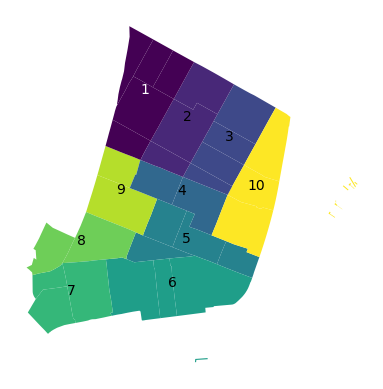

In [24]:
# create sector map
cb3_gdf_diss = cb3_gdf.dissolve(by='sectors').reset_index()
cb3_gdf_diss['coords'] = cb3_gdf_diss['geometry'].centroid.apply(lambda x: x.coords[0])
ax = cb3_gdf.plot(column='sectors')
for idx, row in cb3_gdf_diss.iterrows():
    color='black'
    if row['sectors']==1:
        color='white'
    plt.annotate(text=row['sectors'], xy=row['coords'],
                 horizontalalignment='center', color=color)
ax.set_axis_off();

## Load Census Data

In [44]:
census = Census(api_key)

In [45]:
acs_gdf = census.acs5.get(
    (
        # Means of Transportation to Work – Total
        "B08301_001E",
        # Means of Transportation to Work – Total – Public transportation (excluding taxicab) – Subway or elevated rail
        "B08301_012E",
    ),
    geo={
        "for": f"tract:{','.join(cb3_tracts)}",
        "in": f"state:36 county:061",
    },
    year=2023,
)

In [46]:
acs_gdf = pd.DataFrame(acs_gdf).rename(
    columns={
        "B08301_001E": "commuter_count",
        "B08301_012E": "subway_commuter_count",
    }
).assign(year=2023)
acs_gdf

,commuter_count,subway_commuter_count,state,county,tract,year
0,561.0,168.0,36,061,000201,2023
1,2421.0,668.0,36,061,000202,2023
2,3847.0,1364.0,36,061,000600,2023
3,3796.0,1178.0,36,061,000800,2023
4,923.0,175.0,36,061,001001,2023
5,1894.0,770.0,36,061,001002,2023
6,1956.0,705.0,36,061,001200,2023
7,1560.0,525.0,36,061,001401,2023
8,1962.0,791.0,36,061,001402,2023
9,3230.0,1118.0,36,061,001600,2023
